In [1]:
# Import Libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns



### 1. Combine and Clean the Data
#### Import CSVs

In [2]:
# Read the CSV files into DataFrames.

athletes_2020_sales_df = pd.read_csv('../Resources/athletic_sales_2020.csv')
athletes_2021_sales_df = pd.read_csv('../Resources/athletic_sales_2021.csv')

In [3]:
# Display the 2020 sales DataFrame

athletes_2020_sales_df.head()

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
0,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.00,In-store
1,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,68,83,5644,2426.92,Online
2,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,206250,61875.00,Outlet
3,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,34,384,13056,6789.12,Outlet
4,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,4399,1407.68,Outlet


In [4]:
# Display the 2021 sales DataFrame
athletes_2021_sales_df.head()

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
0,West Gear,1128299,1/1/21,West,California,San Francisco,Men's Athletic Footwear,65,750,487500,121875.00,Outlet
1,West Gear,1128299,1/1/21,West,California,San Francisco,Men's Athletic Footwear,51,233,11883,3208.41,Outlet
2,Kohl's,1189833,1/1/21,Midwest,Montana,Billings,Men's Apparel,50,275,137500,82500.00,Outlet
3,Kohl's,1189833,1/1/21,Midwest,Montana,Billings,Men's Apparel,47,77,3619,2714.25,Online
4,West Gear,1128299,1/1/21,West,California,San Francisco,Men's Athletic Footwear,64,225,14400,5184.00,Online


#### Check the data types of each DataFrame

In [5]:
# Check the 2020 sales data types.

athletes_2020_sales_df.dtypes

retailer             object
retailer_id           int64
invoice_date         object
region               object
state                object
city                 object
product              object
price_per_unit        int64
units_sold            int64
total_sales           int64
operating_profit    float64
sales_method         object
dtype: object

In [6]:
# Check the 2021 sales data types.
athletes_2021_sales_df.dtypes

retailer             object
retailer_id           int64
invoice_date         object
region               object
state                object
city                 object
product              object
price_per_unit        int64
units_sold            int64
total_sales           int64
operating_profit    float64
sales_method         object
dtype: object

#### Combine the sales data by rows.

In [7]:
# Combine the 2020 and 2021 sales DataFrames on the rows and reset the index.

# Combine the two DataFrames by rows (since they have the same columns & data types)
combined_sales_df = pd.concat([athletes_2020_sales_df, athletes_2021_sales_df], axis=0, join='inner')

# Reset the index
combined_sales_df.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
combined_sales_df.head()


,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
0,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.00,In-store
1,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,68,83,5644,2426.92,Online
2,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,206250,61875.00,Outlet
3,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,34,384,13056,6789.12,Outlet
4,Foot Locker,1185732,1/1/20,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,4399,1407.68,Outlet


In [8]:
# Check if any values are null.

combined_sales_df.isnull().sum()

retailer            0
retailer_id         0
invoice_date        0
region              0
state               0
city                0
product             0
price_per_unit      0
units_sold          0
total_sales         0
operating_profit    0
sales_method        0
dtype: int64

In [9]:
# Check the data type of each column

combined_sales_df.dtypes

retailer             object
retailer_id           int64
invoice_date         object
region               object
state                object
city                 object
product              object
price_per_unit        int64
units_sold            int64
total_sales           int64
operating_profit    float64
sales_method         object
dtype: object

In [10]:
# Convert the "invoice_date" to a datetime datatype
# Specify a format for invoice_date (example: YYYY-MM-DD)

combined_sales_df['invoice_date'] = pd.to_datetime(combined_sales_df['invoice_date'])


/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_8896/364572500.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_sales_df['invoice_date'] = pd.to_datetime(combined_sales_df['invoice_date'])


In [11]:
print(combined_sales_df.shape)
print(athletes_2020_sales_df.shape)
print(athletes_2021_sales_df.shape)

(9643, 12)
(1297, 12)
(8346, 12)


In [12]:
# Confirm that the "invoice_date" data type has been changed.

combined_sales_df.dtypes

retailer                    object
retailer_id                  int64
invoice_date        datetime64[ns]
region                      object
state                       object
city                        object
product                     object
price_per_unit               int64
units_sold                   int64
total_sales                  int64
operating_profit           float64
sales_method                object
dtype: object

### 2. Determine which Region Sold the Most Products

#### Using `groupby`

In [13]:
# Show the number products sold for region, state, and city.
# Rename the sum to "Total_Products_Sold".

# Group by region, state, and city and sum units sold
region_state_city_sales_df = combined_sales_df.groupby(['region', 'state', 'city'])['units_sold'].sum().reset_index()

# Rename the column 'units_sold' to 'Total_Products_Sold'
region_state_city_sales_df = region_state_city_sales_df.rename(columns={'units_sold': 'Total_Products_Sold'})

# Sort the results in descending order by 'Total_Products_Sold'
sorted_sales_by_region_state_city_df = region_state_city_sales_df.sort_values(by='Total_Products_Sold', ascending=False)

# Show the top 5 regions, states, and cities with the greatest number of products sold
sorted_sales_by_region_state_city_df.head()



,region,state,city,Total_Products_Sold
21,Northeast,New York,New York,111954
33,South,Texas,Houston,90322
44,West,California,San Francisco,85478
43,West,California,Los Angeles,76384
34,Southeast,Florida,Miami,73135


#### Using `pivot_table`

In [14]:
# Create a pivot table to show the number of products sold for each region, state, and city

# Create a pivot table to show the number of products sold for each region, state, and city
pivot_sales_by_region_state_city_df = combined_sales_df.pivot_table(
    index=['region', 'state', 'city'],
    values='units_sold',
    aggfunc='sum'
).reset_index()

# Rename the 'units_sold' column to 'Total_Products_Sold'
pivot_sales_by_region_state_city_df = pivot_sales_by_region_state_city_df.rename(columns={'units_sold': 'Total_Products_Sold'})

# Sort the results in descending order by 'Total_Products_Sold'
sorted_pivot_sales_by_region_state_city_df = pivot_sales_by_region_state_city_df.sort_values(by='Total_Products_Sold', ascending=False)

# Display the top 5 regions, states, and cities with the greatest number of products sold
sorted_pivot_sales_by_region_state_city_df.head()





,region,state,city,Total_Products_Sold
21,Northeast,New York,New York,111954
33,South,Texas,Houston,90322
44,West,California,San Francisco,85478
43,West,California,Los Angeles,76384
34,Southeast,Florida,Miami,73135


### 3. Determine which Region had the Most Sales

#### Using `groupby`

In [15]:
# Show the total sales for the products sold for each region, state, and city.
# Rename the "total_sales" column to "Total Sales"

# Group by region, state, and city and sum total sales
region_state_city_total_sales_df = combined_sales_df.groupby(['region', 'state', 'city'])['total_sales'].sum().reset_index()

# Rename the column 'total_sales' to 'Total_Sales'
region_state_city_total_sales_df = region_state_city_total_sales_df.rename(columns={'total_sales': 'Total_Sales'})

# Sort the results in descending order by 'Total_Sales'
sorted_total_sales_by_region_state_city_df = region_state_city_total_sales_df.sort_values(by='Total_Sales', ascending=False)

# Display the top 5 regions, states, and cities with the most sales
top_5_total_sales_by_region_state_city_df = sorted_total_sales_by_region_state_city_df.head()

top_5_total_sales_by_region_state_city_df




,region,state,city,Total_Sales
21,Northeast,New York,New York,39801235
44,West,California,San Francisco,33973228
34,Southeast,Florida,Miami,31600863
39,Southeast,South Carolina,Charleston,29285637
35,Southeast,Florida,Orlando,27682851


#### Using `pivot_table`

In [16]:
# Show the total sales for the products sold for each region, state, and city.


# Create a pivot table to show the total sales for each region, state, and city
pivot_total_sales_by_region_state_city_df = combined_sales_df.pivot_table(
    index=['region', 'state', 'city'],
    values='total_sales',
    aggfunc='sum'
).reset_index()

# Rename the 'total_sales' column to 'Total_Sales'
pivot_total_sales_by_region_state_city_df = pivot_total_sales_by_region_state_city_df.rename(columns={'total_sales': 'Total_Sales'})

# Sort the results in descending order by 'Total_Sales'
sorted_pivot_total_sales_by_region_state_city_df = pivot_total_sales_by_region_state_city_df.sort_values(by='Total_Sales', ascending=False)

# Display the top 5 regions, states, and cities with the most sales
sorted_pivot_total_sales_by_region_state_city_df.head()



,region,state,city,Total_Sales
21,Northeast,New York,New York,39801235
44,West,California,San Francisco,33973228
34,Southeast,Florida,Miami,31600863
39,Southeast,South Carolina,Charleston,29285637
35,Southeast,Florida,Orlando,27682851


### 4. Determine which Retailer had the Most Sales

#### Using `groupby`

In [17]:
# Show the total sales for the products sold for each retailer, region, state, and city.
# Rename the "total_sales" column to "Total Sales"

# Group by retailer, region, state, and city and sum total sales
retailer_sales_df = combined_sales_df.groupby(['retailer', 'region', 'state', 'city'])['total_sales'].sum().reset_index()

# Rename the column 'total_sales' to 'Total_Sales'
retailer_sales_df = retailer_sales_df.rename(columns={'total_sales': 'Total_Sales'})

# Sort the results in descending order by 'Total_Sales'
sorted_retailer_sales_df = retailer_sales_df.sort_values(by='Total_Sales', ascending=False)

# Display the top 5 retailers with the most sales
top_5_retailer_sales_df = sorted_retailer_sales_df.head()

top_5_retailer_sales_df



,retailer,region,state,city,Total_Sales
103,West Gear,West,California,San Francisco,32794405
50,Kohl's,West,California,Los Angeles,25127160
22,Foot Locker,Northeast,New York,New York,25008568
109,West Gear,West,Washington,Seattle,24862675
33,Foot Locker,Southeast,South Carolina,Charleston,24822280


#### Using `pivot_table`

In [18]:
# Show the total sales for the products sold for each retailer, region, state, and city.

# Create a pivot table to show the total sales for each retailer, region, state, and city
pivot_retailer_sales_df = combined_sales_df.pivot_table(
    index=['retailer', 'region', 'state', 'city'],
    values='total_sales',
    aggfunc='sum'
).reset_index()

# Rename the 'total_sales' column to 'Total_Sales'
pivot_retailer_sales_df = pivot_retailer_sales_df.rename(columns={'total_sales': 'Total_Sales'})

# Sort the results in descending order by 'Total_Sales'
sorted_pivot_retailer_sales_df = pivot_retailer_sales_df.sort_values(by='Total_Sales', ascending=False)

# Display the top 5 retailers with the most sales
sorted_pivot_retailer_sales_df.head()



,retailer,region,state,city,Total_Sales
103,West Gear,West,California,San Francisco,32794405
50,Kohl's,West,California,Los Angeles,25127160
22,Foot Locker,Northeast,New York,New York,25008568
109,West Gear,West,Washington,Seattle,24862675
33,Foot Locker,Southeast,South Carolina,Charleston,24822280


### 5. Determine which Retailer Sold the Most Women's Athletic Footwear

In [19]:
# Filter the DataFrame for Women's Athletic Footwear
womens_footwear_sales_df = combined_sales_df[combined_sales_df['product'] == "Women's Athletic Footwear"]

# Show the top 5 results.
womens_footwear_sales_df.head()


,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
21,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,36,281,10116,3742.92,Outlet
22,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,41,247,10127,4658.42,Online
23,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.00,In-store
26,West Gear,1128299,2020-01-05,Northeast,Pennsylvania,Philadelphia,Women's Athletic Footwear,45,300,135000,47250.00,Outlet
27,West Gear,1128299,2020-01-05,Northeast,Pennsylvania,Philadelphia,Women's Athletic Footwear,34,90,3060,1254.60,Outlet


#### Using `groupby`

In [20]:

# Group by retailer, region, state, and city and sum women's footwear units sold
retailer_womens_footwear_sales_df = womens_footwear_sales_df.groupby(['retailer', 'region', 'state', 'city'])['units_sold'].sum().reset_index()

# Rename the column 'units_sold' to 'Womens_Footwear_Units_Sold'
retailer_womens_footwear_sales_df = retailer_womens_footwear_sales_df.rename(columns={'units_sold': 'Womens_Footwear_Units_Sold'})

# Sort the results in descending order by 'Womens_Footwear_Units_Sold'
sorted_womens_footwear_sales_df = retailer_womens_footwear_sales_df.sort_values(by='Womens_Footwear_Units_Sold', ascending=False)

# Display the top 5 retailers with the most women's athletic footwear sales
top_5_womens_footwear_sales_df = sorted_womens_footwear_sales_df.head()

top_5_womens_footwear_sales_df




,retailer,region,state,city,Womens_Footwear_Units_Sold
101,West Gear,West,California,San Francisco,12107
22,Foot Locker,Northeast,New York,New York,10996
49,Kohl's,West,California,Los Angeles,10826
33,Foot Locker,Southeast,South Carolina,Charleston,8814
68,Sports Direct,South,Texas,Dallas,8790


#### Using `pivot_table`

In [21]:
# Show the total number of women's athletic footwear sold for each retailer, region, state, and city.
# Use pivot_table to show the total number of women's athletic footwear sold for each retailer, region, state, and city

# Create a pivot table to show the total women's footwear units sold for each retailer, region, state, and city
pivot_womens_footwear_sales_df = womens_footwear_sales_df.pivot_table(
    index=['retailer', 'region', 'state', 'city'],
    values='units_sold',
    aggfunc='sum'
).reset_index()

# Rename the 'units_sold' column to 'Womens_Footwear_Units_Sold'
pivot_womens_footwear_sales_df = pivot_womens_footwear_sales_df.rename(columns={'units_sold': 'Womens_Footwear_Units_Sold'})
                                                                                

# Sort the results in descending order by 'Womens_Footwear_Units_Sold'
sorted_pivot_womens_footwear_sales_df = pivot_womens_footwear_sales_df.sort_values(by='Womens_Footwear_Units_Sold', ascending=False)

# Show the top 5 results
top_5_womens_footwear_sales_pivot_df = sorted_pivot_womens_footwear_sales_df.head()

# Display the results
top_5_womens_footwear_sales_pivot_df




,retailer,region,state,city,Womens_Footwear_Units_Sold
101,West Gear,West,California,San Francisco,12107
22,Foot Locker,Northeast,New York,New York,10996
49,Kohl's,West,California,Los Angeles,10826
33,Foot Locker,Southeast,South Carolina,Charleston,8814
68,Sports Direct,South,Texas,Dallas,8790


### 6. Determine the Day with the Most Women's Athletic Footwear Sales

In [22]:
combined_sales_df.dtypes


retailer                    object
retailer_id                  int64
invoice_date        datetime64[ns]
region                      object
state                       object
city                        object
product                     object
price_per_unit               int64
units_sold                   int64
total_sales                  int64
operating_profit           float64
sales_method                object
dtype: object

In [23]:
# Filter the combined DataFrame for Women's Athletic Footwear sales data and make a copy
womens_footwear_sales_df = combined_sales_df[combined_sales_df['product'].str.contains("Women's Athletic Footwear", case=False, na=False)].copy()

# Create a pivot table with 'invoice_date' as the index and 'total_sales' as the values
daily_sales_pivot_df = womens_footwear_sales_df.pivot_table(
    index='invoice_date',
    values='total_sales',
    aggfunc='sum'
)

# Optional: Rename the aggregated column to 'Total_Sales'
daily_sales_pivot_df = daily_sales_pivot_df.rename(columns={'total_sales': 'Total_Sales'})

# Resample the data to get total sales per day (resample by day 'D')
daily_sales_df = daily_sales_pivot_df.resample('D').sum()

# Sort the resampled DataFrame by 'Total_Sales'
sorted_daily_sales_df = daily_sales_df.sort_values(by='Total_Sales', ascending=False)

# Display the top 10 days with the most women's athletic footwear sales
top_10_sales_days_df = sorted_daily_sales_df.head(10)

# Show the result
print(top_10_sales_days_df)




              Total_Sales
invoice_date             
2021-07-16        1521825
2021-12-16        1473497
2021-06-17        1376988
2021-08-17        1086294
2021-07-23        1021806
2021-11-17        1021145
2021-12-09         915011
2021-06-24         884238
2021-07-09         869054
2021-08-10         839120


### 7.  Determine the Week with the Most Women's Athletic Footwear Sales

In [24]:
# Resample the pivot table to place the data into weekly bins and get total sales for each week
weekly_sales_df = daily_sales_pivot_df.resample('W').sum()

# Dynamically reference the correct column for sorting
sorted_weekly_sales_df = weekly_sales_df.sort_values(by=weekly_sales_df.columns[0], ascending=False)

# Display the top 10 weeks with the most women's athletic footwear sales
top_10_weekly_sales_df = sorted_weekly_sales_df.head(10)

# Show the result
top_10_weekly_sales_df


,Total_Sales
invoice_date,
2021-12-19,3098970
2021-12-12,2922161
2021-07-11,2835078
2021-07-18,2801449
2021-11-14,2531721
2021-08-22,2491259
2021-08-15,2463941
2021-11-21,2449537
2021-05-16,2422132


# Bonus: Visual Insights

As part of this assignment, I chose to go beyond the standard data analysis and incorporate a comprehensive set of visualizations to present the findings in a more accessible and intuitive manner. Data visualizations serve as powerful tools for storytelling by enabling quick interpretation of trends, patterns, and key insights. By transforming raw data into easy-to-understand visuals, it becomes simpler for stakeholders to make informed decisions and uncover hidden opportunities.

### Why These Visuals?

The visualizations selected for this analysis were chosen to answer critical business questions, such as:

- **Sales Trends Over Time**: Understanding how women's athletic footwear sales fluctuate on a daily, weekly, and monthly basis is crucial for inventory management and marketing strategies.
- **Performance by Region and Retailer**: Bar plots and heatmaps showcase which regions and retailers are driving the most sales, helping prioritize business efforts.
- **Product Performance and Distribution**: By analyzing units sold and price distributions, we gain insight into product demand and pricing strategy, ultimately improving profit margins.
- **Sales Methodology**: The comparison of online vs. in-store sales across retailers offers insight into how consumer preferences vary based on the sales method.

These visuals not only complement the raw data but also provide actionable insights at a glance. Each chart highlights key aspects of the sales data, allowing decision-makers to focus on areas for improvement, growth opportunities, and optimization of resources.

Overall, the addition of visualizations greatly enhances the interpretability of the data, allowing for faster and more effective analysis.


/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_8896/2694704849.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_labels, y=top_10_sales_days_df['total_sales'], palette="Blues_d")


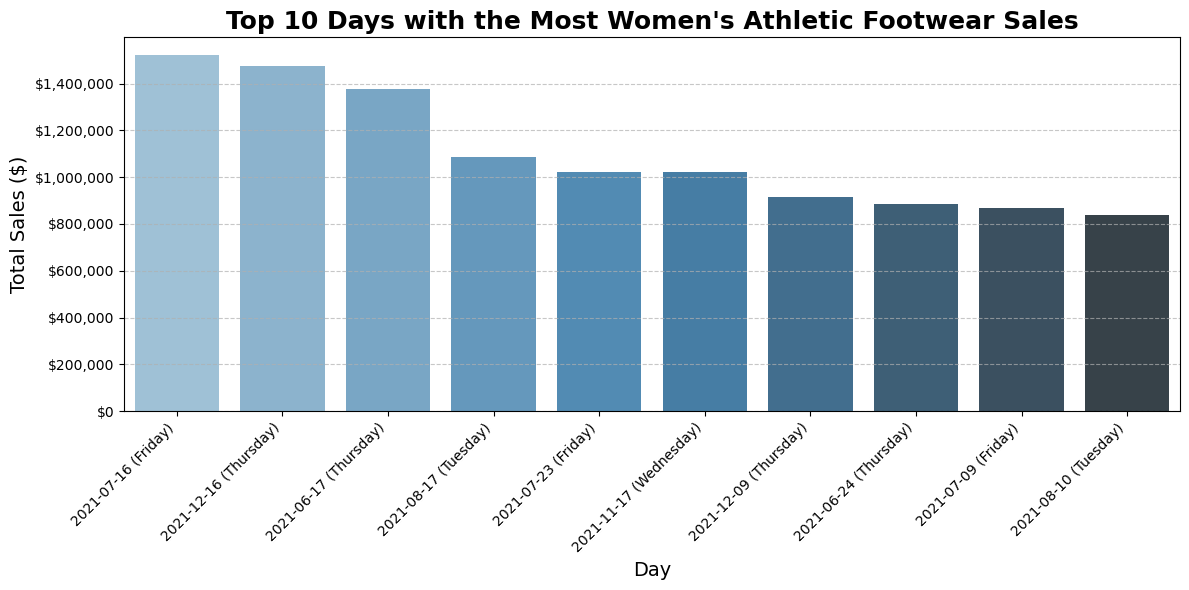

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_8896/2694704849.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_weekly_sales_df.index.strftime('%Y-%U'), y=top_10_weekly_sales_df['total_sales'], palette="Greens_d")


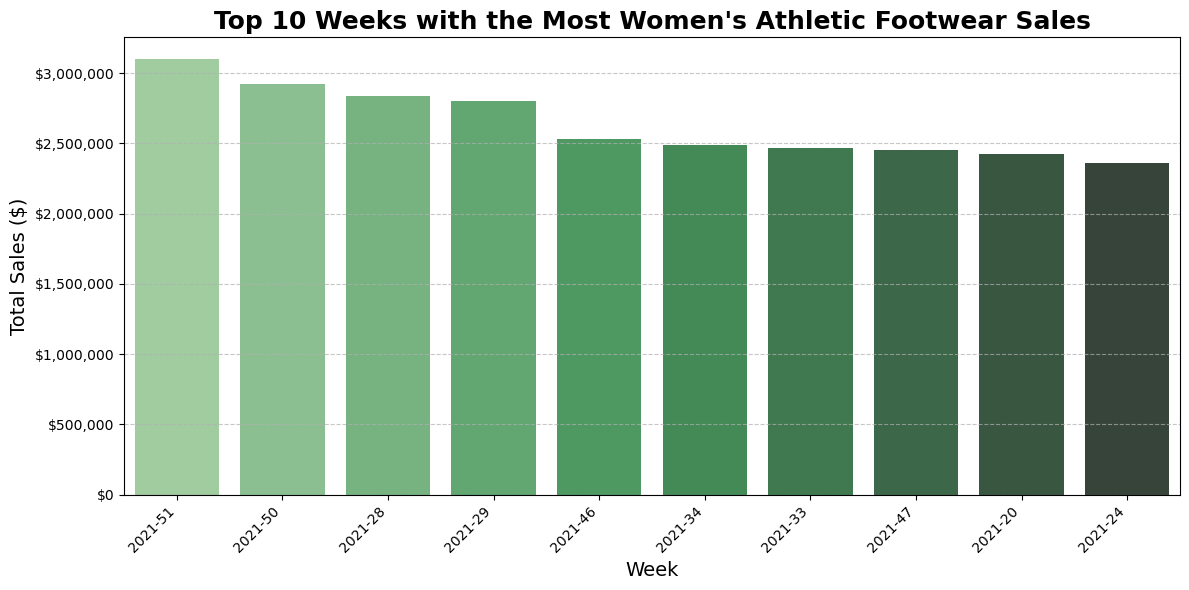

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_8896/2694704849.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_df = womens_footwear_sales_df.resample('M', on='invoice_date')['total_sales'].sum().reset_index()


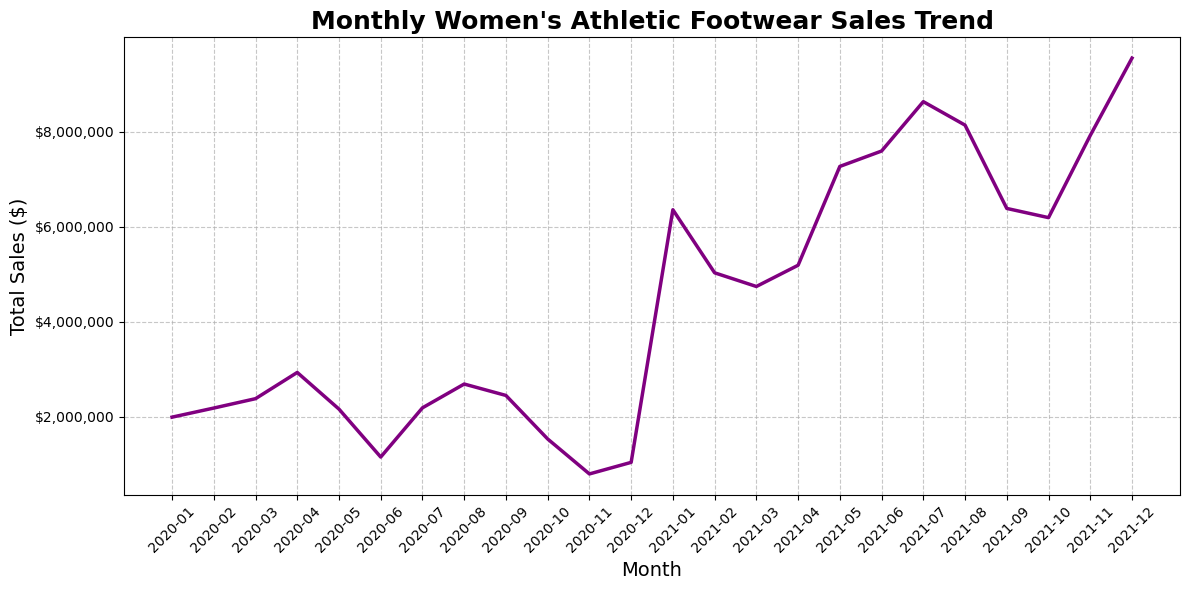

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_8896/2694704849.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='retailer', y='total_sales', data=womens_footwear_sales_df, palette="coolwarm", errorbar=None)


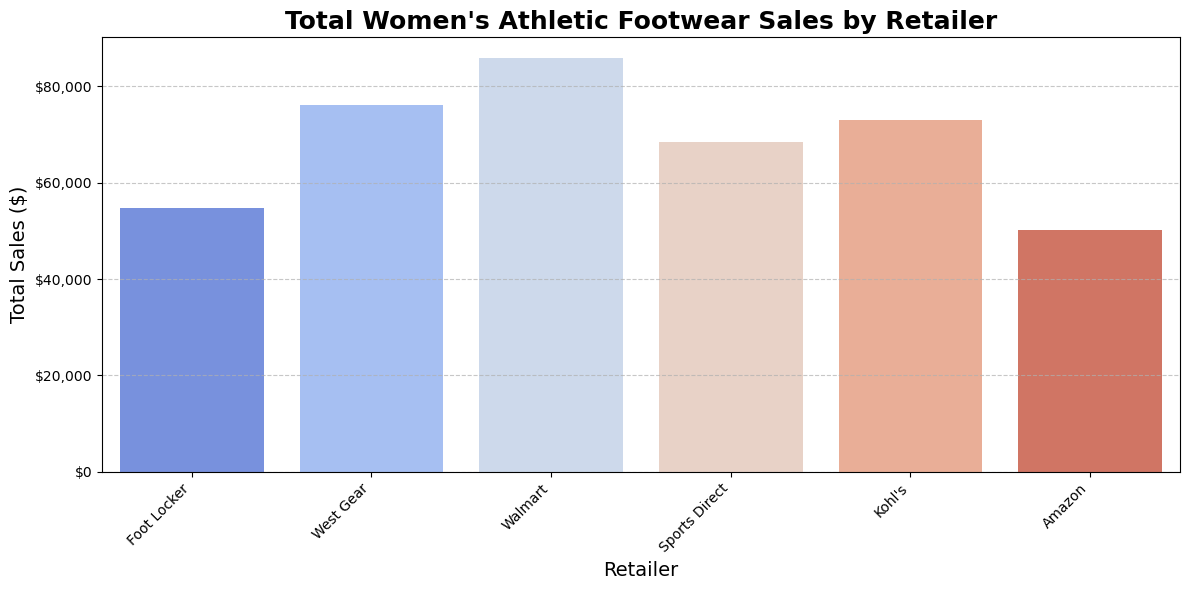

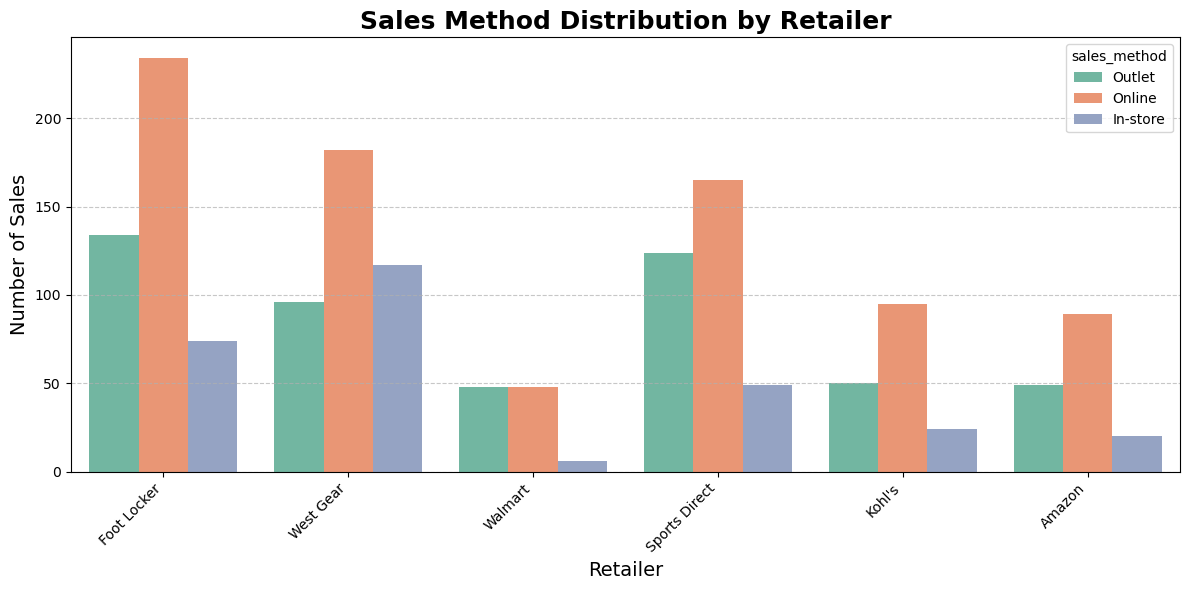

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_8896/2694704849.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='operating_profit', data=combined_sales_df, palette="Spectral", errorbar=None)


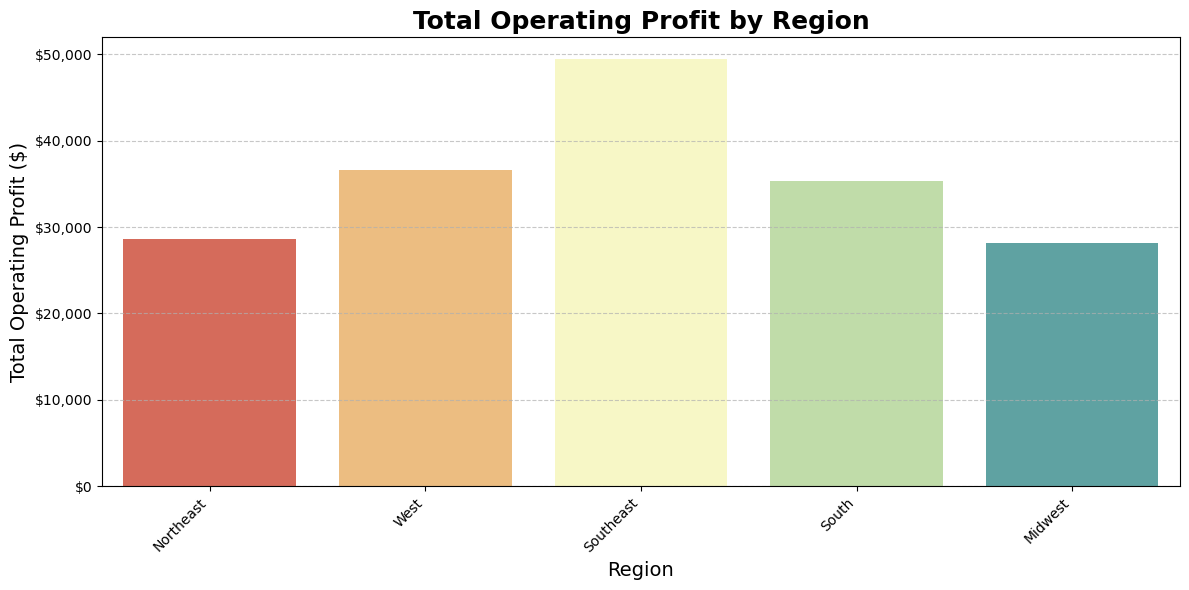

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_8896/2694704849.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='price_per_unit', data=filtered_top_15_cities_df, palette="coolwarm")


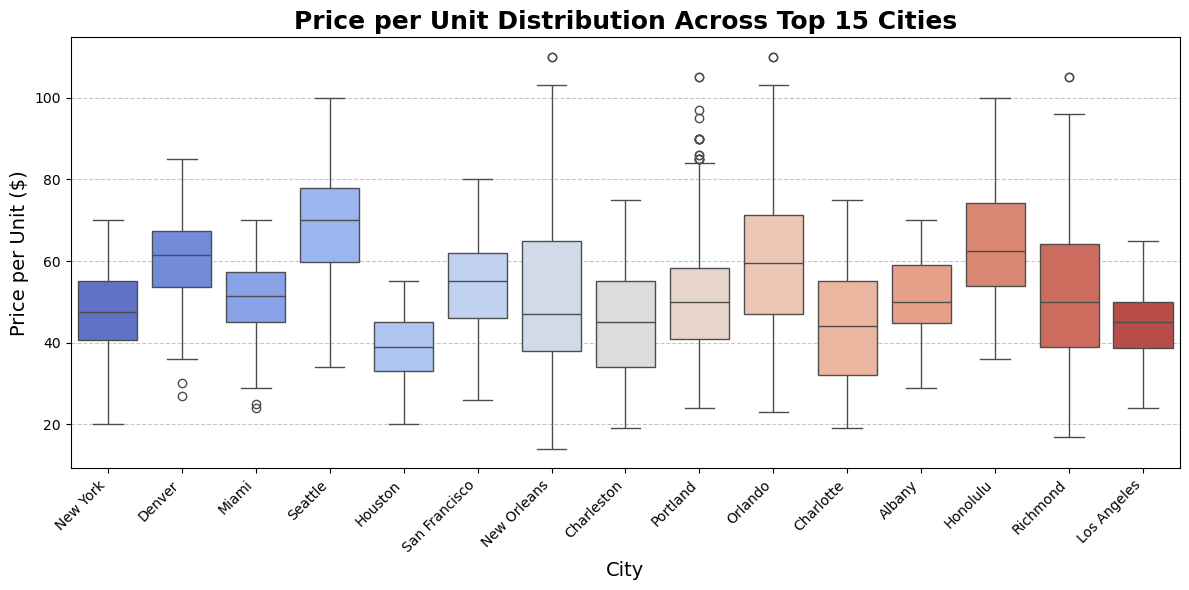

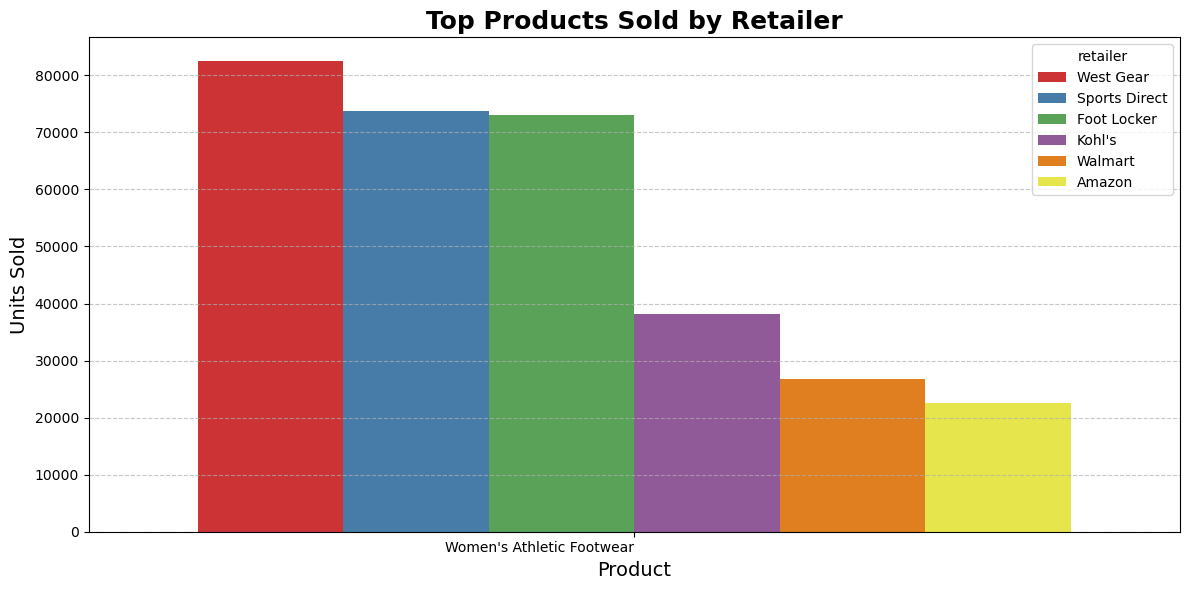

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_8896/2694704849.py:114: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_by_region_df = womens_footwear_sales_df.groupby(['region', pd.Grouper(key='invoice_date', freq='M')])['total_sales'].sum().reset_index()


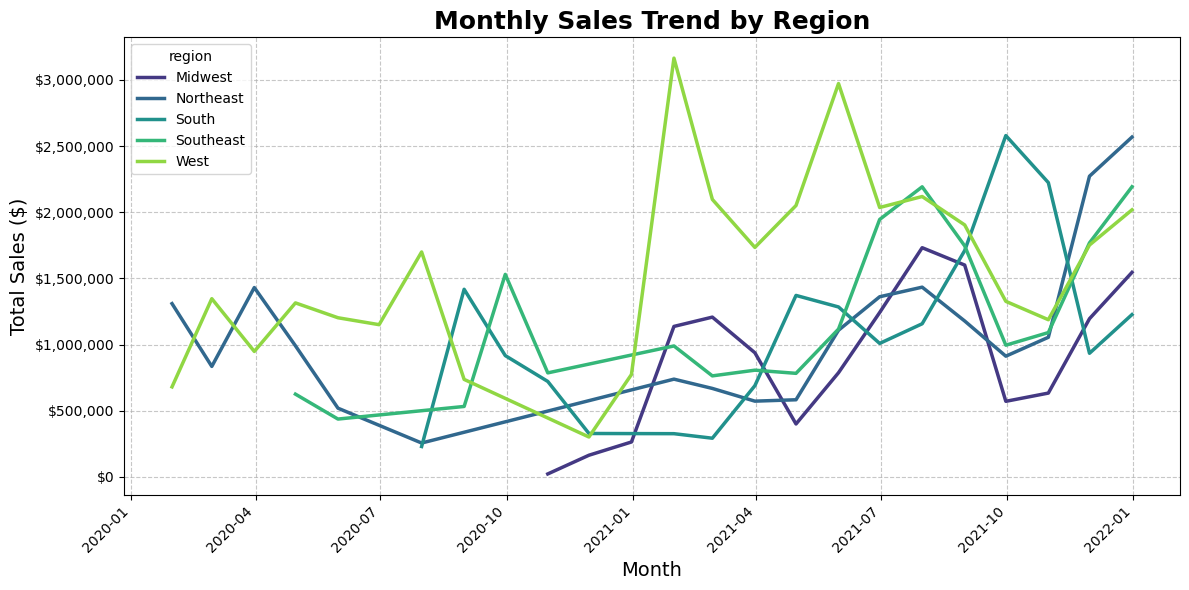

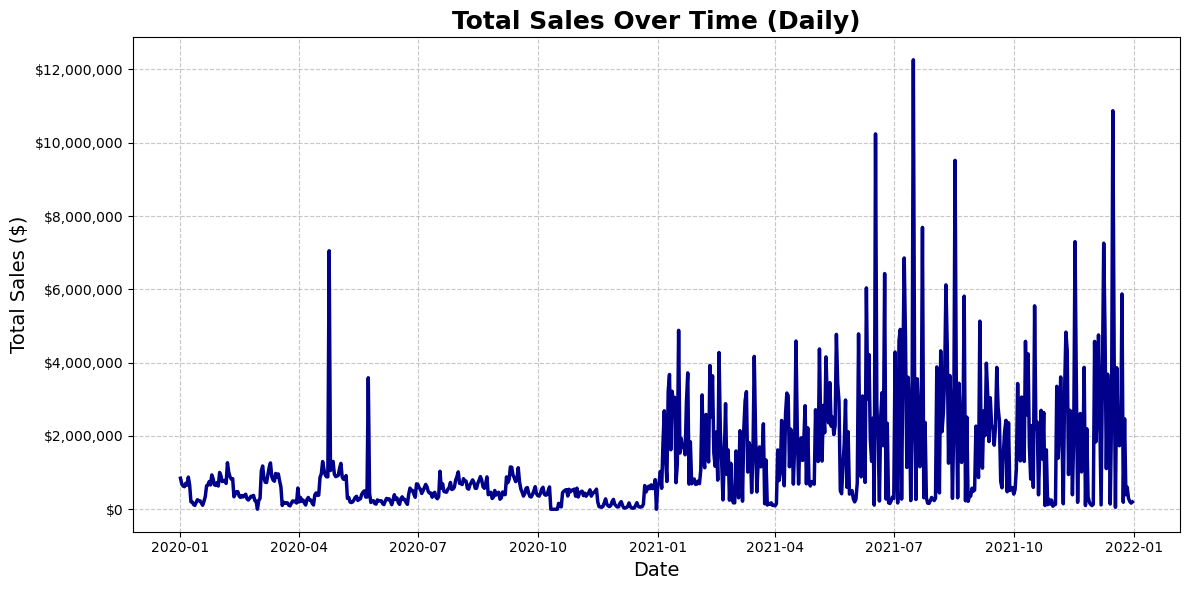

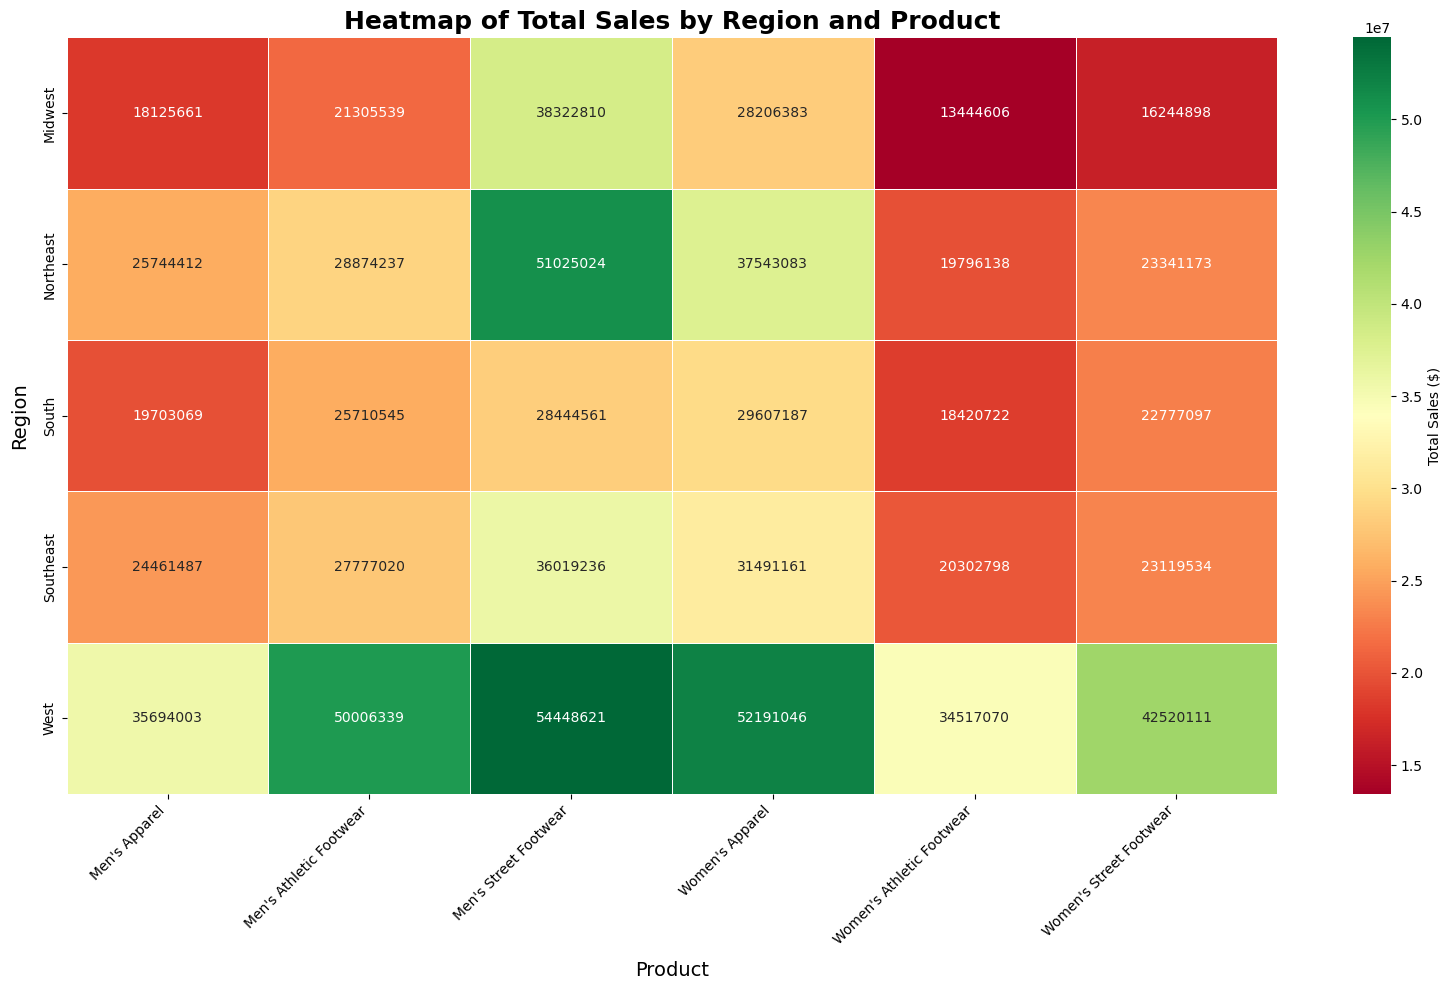

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_8896/2694704849.py:153: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='units_sold', data=combined_sales_df, palette="coolwarm")


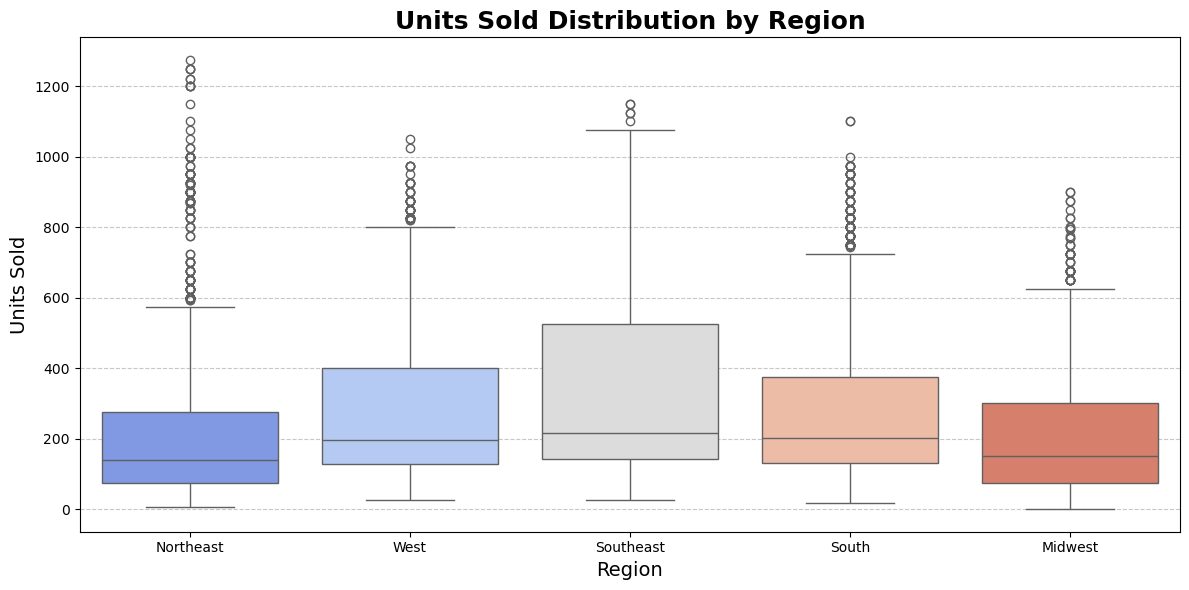

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_8896/2694704849.py:162: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_by_product_df = combined_sales_df.groupby([pd.Grouper(key='invoice_date', freq='M'), 'product'])['total_sales'].sum().reset_index()


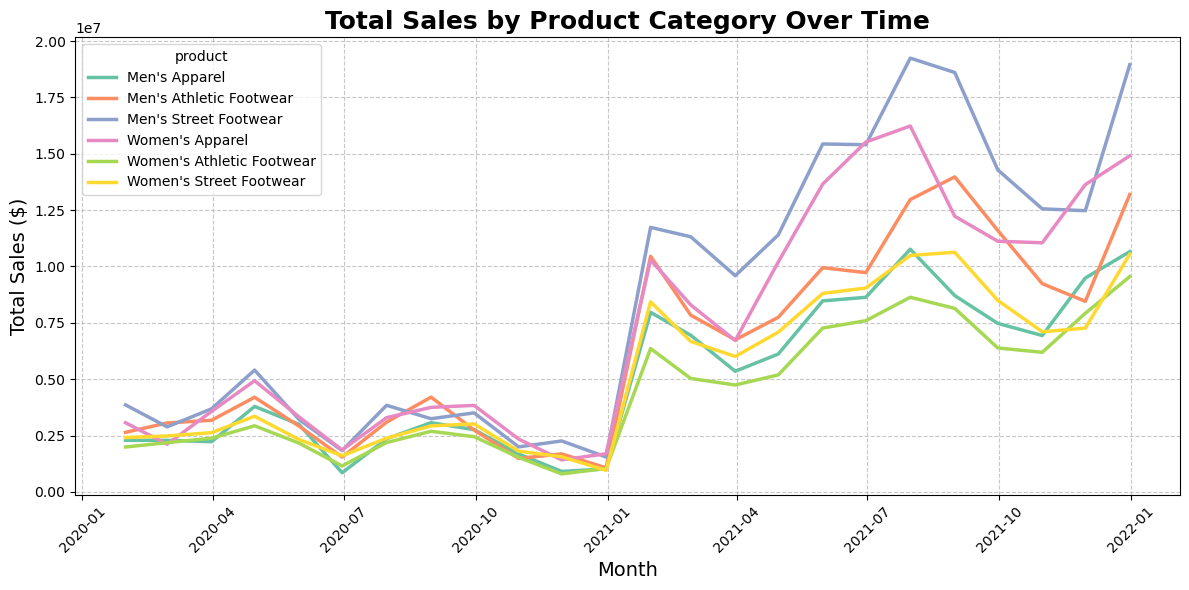

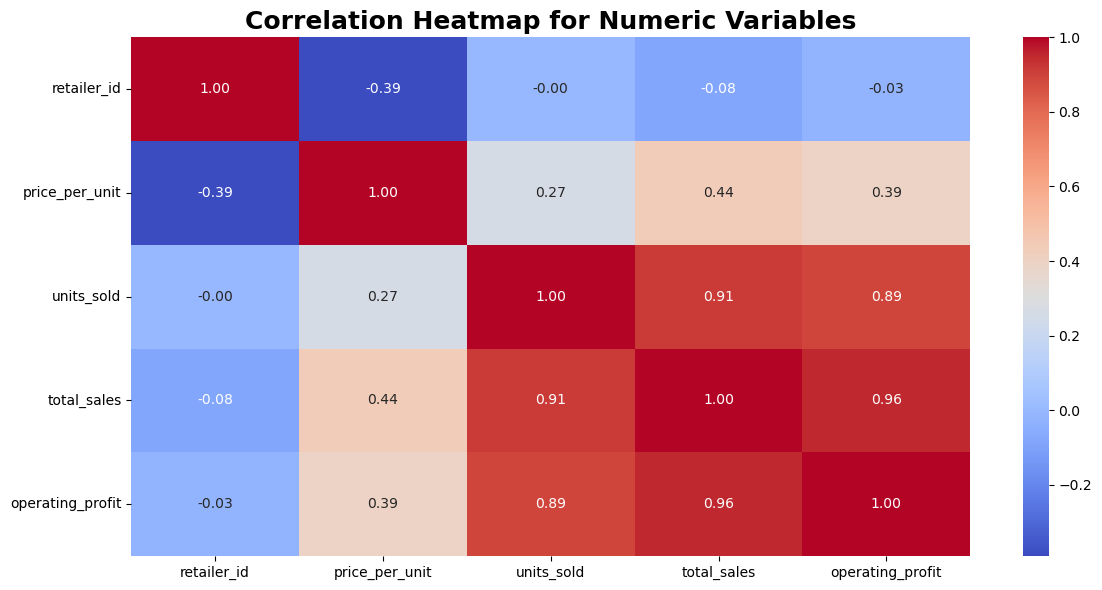

In [25]:
# Ensure datetime conversion for date-related operations
womens_footwear_sales_df['invoice_date'] = pd.to_datetime(womens_footwear_sales_df['invoice_date'])
combined_sales_df['invoice_date'] = pd.to_datetime(combined_sales_df['invoice_date'])

# 1. Bar plot for the top 10 days with the most women's athletic footwear sales
top_10_sales_days_df = womens_footwear_sales_df.resample('D', on='invoice_date')['total_sales'].sum().nlargest(10).to_frame()
top_10_sales_days_df['day_of_week'] = top_10_sales_days_df.index.strftime('%A')
x_labels = top_10_sales_days_df.index.strftime('%Y-%m-%d') + ' (' + top_10_sales_days_df['day_of_week'] + ')'

plt.figure(figsize=(12, 6))
sns.barplot(x=x_labels, y=top_10_sales_days_df['total_sales'], palette="Blues_d")
plt.title('Top 10 Days with the Most Women\'s Athletic Footwear Sales', fontsize=18, weight='bold')
plt.xlabel('Day', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Bar plot for the top 10 weeks with the most women's athletic footwear sales
top_10_weekly_sales_df = womens_footwear_sales_df.resample('W', on='invoice_date')['total_sales'].sum().nlargest(10).to_frame()
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_weekly_sales_df.index.strftime('%Y-%U'), y=top_10_weekly_sales_df['total_sales'], palette="Greens_d")
plt.title('Top 10 Weeks with the Most Women\'s Athletic Footwear Sales', fontsize=18, weight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Line plot for monthly sales trend
monthly_sales_df = womens_footwear_sales_df.resample('M', on='invoice_date')['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_df, x=monthly_sales_df['invoice_date'].dt.strftime('%Y-%m'), y='total_sales', color='purple', linewidth=2.5)
plt.title('Monthly Women\'s Athletic Footwear Sales Trend', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Bar plot for total sales by retailer
plt.figure(figsize=(12, 6))
sns.barplot(x='retailer', y='total_sales', data=womens_footwear_sales_df, palette="coolwarm", errorbar=None)
plt.title('Total Women\'s Athletic Footwear Sales by Retailer', fontsize=18, weight='bold')
plt.xlabel('Retailer', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Retailer vs. Sales Method Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='retailer', hue='sales_method', data=womens_footwear_sales_df, palette="Set2")
plt.title('Sales Method Distribution by Retailer', fontsize=18, weight='bold')
plt.xlabel('Retailer', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6. Bar plot for total operating profit by region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='operating_profit', data=combined_sales_df, palette="Spectral", errorbar=None)
plt.title('Total Operating Profit by Region', fontsize=18, weight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Operating Profit ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 7. Boxplot for price per unit distribution across the top 15 cities
top_15_cities_df = combined_sales_df.groupby('city')['total_sales'].sum().nlargest(15).reset_index()
filtered_top_15_cities_df = combined_sales_df[combined_sales_df['city'].isin(top_15_cities_df['city'])]
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price_per_unit', data=filtered_top_15_cities_df, palette="coolwarm")
plt.title('Price per Unit Distribution Across Top 15 Cities', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Price per Unit ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 8. Bar plot for top products sold by retailer
top_products_by_retailer_df = womens_footwear_sales_df.groupby(['retailer', 'product'])['units_sold'].sum().reset_index()
top_products_by_retailer_df = top_products_by_retailer_df.sort_values(by='units_sold', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='product', y='units_sold', hue='retailer', data=top_products_by_retailer_df, palette="Set1")
plt.title('Top Products Sold by Retailer', fontsize=18, weight='bold')
plt.xlabel('Product', fontsize=14)
plt.ylabel('Units Sold', fontsize=14)
plt.xticks(rotation=0, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 9. Line plot for sales trend by region
monthly_sales_by_region_df = womens_footwear_sales_df.groupby(['region', pd.Grouper(key='invoice_date', freq='M')])['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='invoice_date', y='total_sales', hue='region', data=monthly_sales_by_region_df, palette="viridis", linewidth=2.5)
plt.title('Monthly Sales Trend by Region', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 10. Total Sales Over Time (Daily)
daily_sales_df = combined_sales_df.resample('D', on='invoice_date')['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='invoice_date', y='total_sales', data=daily_sales_df, color='darkblue', linewidth=2.5)
plt.title('Total Sales Over Time (Daily)', fontsize=18, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 11. Heatmap of Sales by Region and Product
sales_heatmap_df = combined_sales_df.pivot_table(values='total_sales', index='region', columns='product', aggfunc='sum')
plt.figure(figsize=(16, 10))
sns.heatmap(sales_heatmap_df, cmap='RdYlGn', annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label': 'Total Sales ($)'})
plt.title('Heatmap of Total Sales by Region and Product', fontsize=18, weight='bold')
plt.xlabel('Product', fontsize=14, labelpad=10)
plt.ylabel('Region', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 12. Units Sold Distribution by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='units_sold', data=combined_sales_df, palette="coolwarm")
plt.title('Units Sold Distribution by Region', fontsize=18, weight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Units Sold', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 13. Total Sales by Product Category Over Time (Monthly)
monthly_sales_by_product_df = combined_sales_df.groupby([pd.Grouper(key='invoice_date', freq='M'), 'product'])['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='invoice_date', y='total_sales', hue='product', data=monthly_sales_by_product_df, palette="Set2", linewidth=2.5)
plt.title('Total Sales by Product Category Over Time', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 14. Correlation Heatmap for Numeric Variables
numeric_columns = combined_sales_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numeric Variables', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()


